## Data Preparations

### 1. Load the data

In [2]:
import pandas as pd
import numpy as np

# Load teh dataset
path = r"C:\Users\Admin\Desktop\Desmondonam\Careerera\Projects\Cutomer_Analysis\data\sample_dataset.csv"
df = pd.read_csv(path)

### 2. Inspect the data

In [3]:
df.head()

id                 name   age    income  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd      Thomas Gonzalez  42.0  92701.95   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455  Christopher Barrett  66.0  67632.79   
2  eb1167b3-67a9-4378-bc65-c1e582e2e662         Kathy Willis  44.0  22836.08   
3  f7c1bd87-4da5-4709-9471-3d60c8a70639      Shannon Bullock  20.0  83378.92   
4  e443df78-9558-467f-9ba9-1faf7a024204       Steven Johnson  34.0  44448.31   

  purchase_date product_category  purchase_amount  is_returned  
0    2021-04-14         Clothing           261.01            1  
1    2021-06-14           Sports           318.51            1  
2    2021-03-31      Electronics           370.91            0  
3    2023-11-04         Clothing            77.07            1  
4    2020-01-12   Home & Kitchen           256.40            0

In [4]:
# Information of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   object 
 1   name              1000 non-null   object 
 2   age               900 non-null    float64
 3   income            902 non-null    float64
 4   purchase_date     1000 non-null   object 
 5   product_category  1000 non-null   object 
 6   purchase_amount   900 non-null    float64
 7   is_returned       1000 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


### 3. Handle Missing values

In [5]:
# Check for missing values
df.isnull().sum()

id                    0
name                  0
age                 100
income               98
purchase_date         0
product_category      0
purchase_amount     100
is_returned           0
dtype: int64

In [6]:
# Fill the missng values with mean
df['age'] = df['age'].fillna(df['age'].mean())
df['income'] = df['income'].fillna(df['income'].mean())
df['purchase_amount'] = df['purchase_amount'].fillna(df['purchase_amount'].mean())

In [7]:
df.isnull().sum()

id                  0
name                0
age                 0
income              0
purchase_date       0
product_category    0
purchase_amount     0
is_returned         0
dtype: int64

### Convert Data Types

In [8]:
# Convert the purchase_date to a datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1000 non-null   object        
 1   name              1000 non-null   object        
 2   age               1000 non-null   float64       
 3   income            1000 non-null   float64       
 4   purchase_date     1000 non-null   datetime64[ns]
 5   product_category  1000 non-null   object        
 6   purchase_amount   1000 non-null   float64       
 7   is_returned       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 62.6+ KB


In [12]:
df.shape

(1000, 8)

## Part 2: EDA

### 1. Basic Plots

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

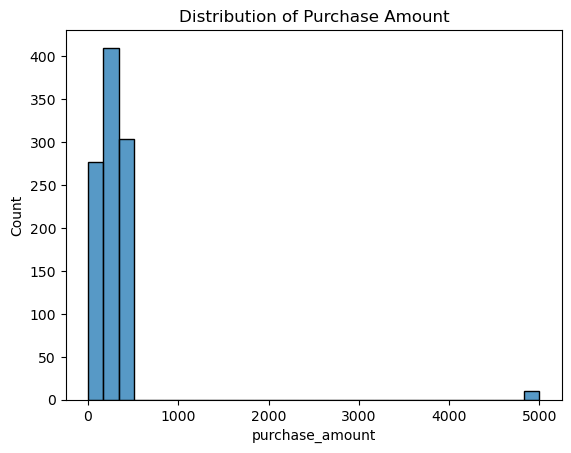

In [13]:
# Histogram of purchase amount 
sns.histplot(df['purchase_amount'], bins = 30)
plt.title("Distribution of Purchase Amount")
plt.show()

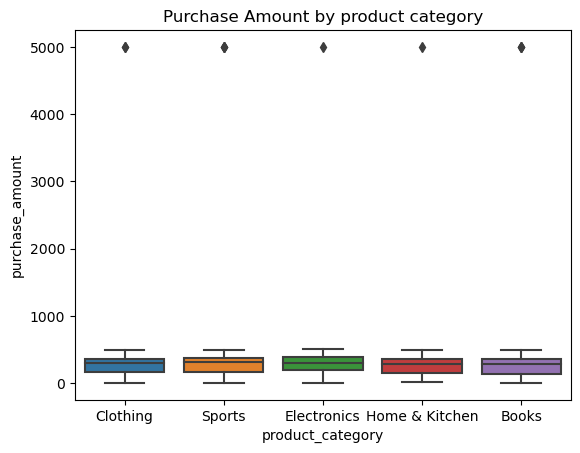

In [14]:
# Give a boxplot of the purchase_amount by the product_category

sns.boxplot(x = 'product_category', y = 'purchase_amount', data = df)
plt.title("Purchase Amount by product category")
plt.show()

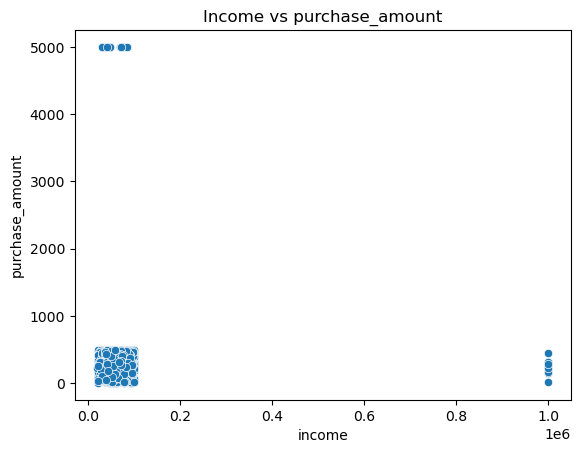

In [15]:
# Give a plot of income vs purchase_amount
sns.scatterplot(x = 'income', y = 'purchase_amount', data = df)
plt.title("Income vs purchase_amount")
plt.show()

## Feature Engineering

In [16]:
df.head()

id                 name   age    income  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd      Thomas Gonzalez  42.0  92701.95   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455  Christopher Barrett  66.0  67632.79   
2  eb1167b3-67a9-4378-bc65-c1e582e2e662         Kathy Willis  44.0  22836.08   
3  f7c1bd87-4da5-4709-9471-3d60c8a70639      Shannon Bullock  20.0  83378.92   
4  e443df78-9558-467f-9ba9-1faf7a024204       Steven Johnson  34.0  44448.31   

  purchase_date product_category  purchase_amount  is_returned  
0    2021-04-14         Clothing           261.01            1  
1    2021-06-14           Sports           318.51            1  
2    2021-03-31      Electronics           370.91            0  
3    2023-11-04         Clothing            77.07            1  
4    2020-01-12   Home & Kitchen           256.40            0

In [17]:
# Extract the year and month from the purchase_date
df['purchase_year'] = df['purchase_date'].dt.year
df['purchase_month'] = df['purchase_date'].dt.month

In [18]:
df.head()

id                 name   age    income  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd      Thomas Gonzalez  42.0  92701.95   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455  Christopher Barrett  66.0  67632.79   
2  eb1167b3-67a9-4378-bc65-c1e582e2e662         Kathy Willis  44.0  22836.08   
3  f7c1bd87-4da5-4709-9471-3d60c8a70639      Shannon Bullock  20.0  83378.92   
4  e443df78-9558-467f-9ba9-1faf7a024204       Steven Johnson  34.0  44448.31   

  purchase_date product_category  purchase_amount  is_returned  purchase_year  \
0    2021-04-14         Clothing           261.01            1           2021   
1    2021-06-14           Sports           318.51            1           2021   
2    2021-03-31      Electronics           370.91            0           2021   
3    2023-11-04         Clothing            77.07            1           2023   
4    2020-01-12   Home & Kitchen           256.40            0           2020   

   purchase_month  
0               4  
1               6  
2               3  
3              11  
4               1

In [22]:
# drop id
df = df.drop(columns = ['name'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age               1000 non-null   float64       
 1   income            1000 non-null   float64       
 2   purchase_date     1000 non-null   datetime64[ns]
 3   product_category  1000 non-null   object        
 4   purchase_amount   1000 non-null   float64       
 5   is_returned       1000 non-null   int64         
 6   purchase_year     1000 non-null   int32         
 7   purchase_month    1000 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(1)
memory usage: 54.8+ KB


In [24]:
### Encode Categorical columns
df = pd.get_dummies(df, columns=['product_category'], drop_first = True)
df.head()

age    income purchase_date  purchase_amount  is_returned  purchase_year  \
0  42.0  92701.95    2021-04-14           261.01            1           2021   
1  66.0  67632.79    2021-06-14           318.51            1           2021   
2  44.0  22836.08    2021-03-31           370.91            0           2021   
3  20.0  83378.92    2023-11-04            77.07            1           2023   
4  34.0  44448.31    2020-01-12           256.40            0           2020   

   purchase_month  product_category_Clothing  product_category_Electronics  \
0               4                       True                         False   
1               6                      False                         False   
2               3                      False                          True   
3              11                       True                         False   
4               1                      False                         False   

   product_category_Home & Kitchen  product_category_Sports  
0                            False                    False  
1                            False                     True  
2                            False                    False  
3                            False                    False  
4                             True                    False

## machine Learning

### Prepare teh data for modelling

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
# Define the features and target
X = df.drop(['purchase_date', 'is_returned'], axis = 1)
y = df['is_returned']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Train the model

In [28]:
# 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# Train the randomforest classifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate teh model
print(confusion_matrix(y_test, y_pred))

[[51 57]
 [38 54]]
